Problem Statement

This project aims to understand how student performance (test scores) is influenced by various factors, including Gender, Ethnicity, Parental Level of Education, Lunch, and Test Preparation Course.

### Dataset Information
 - `Gender`: Sex of students → (Male/Female) 👨
 - `Race/Ethnicity`: Ethnicity of students → (Group A, B, C, D, E) 🏹
Parental Level of Education: Parents' final education → (Bachelor's degree, Some college, Master's degree, Associate's degree, High school) 📚
 - `Lunch`: Having lunch before test → (Standard or Free/reduced) 🍟
 - `Test Preparation Course`: Complete or not complete before test 📝
 - `Math Score €Calculator`;
 - `Reading Score` 📚
 - `Writing Score` ✍

### 1) Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv(r'C:\Users\parha\Documents\Data_Analysis_projects\Student Performance\StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 2) Data Checks to Perform

In [4]:
def check_detail(dataframe):
    d = {'SHAPE': dataframe.shape,
        'COLUMNS': dataframe.columns,
        'INDEX': dataframe.index,
        'VALUE TYPES': dataframe.dtypes,
        'DUPLICATED VALUES': dataframe.duplicated().sum(),
        'NUMBER OF UNIQUE VALUES': dataframe.nunique(),
        'ANY MISSING VALUES': dataframe.isnull().values.any(),
        'MISSING VALUES': dataframe.isnull().sum(),
        'DESCRIBE.T': dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T}
    hashtags = '---------------------------'
    for key, val in d.items():
        print(f'{hashtags} {key} {hashtags}')
        print(val)
    print(f'{hashtags} {"LIST END"} {hashtags}')
   

check_detail(dataframe=df)

--------------------------- SHAPE ---------------------------
(1000, 8)
--------------------------- COLUMNS ---------------------------
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
--------------------------- INDEX ---------------------------
RangeIndex(start=0, stop=1000, step=1)
--------------------------- VALUE TYPES ---------------------------
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object
--------------------------- DUPLICATED VALUES ---------------------------
0
--------------------------- NUMBER OF UNIQUE VALUES ---------------------------
gender                          2


In [5]:
def grab_col_names(df):
    # Separate columns into categorical and numerical
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    numerical_cols = df.select_dtypes(include=['number']).columns

    print(f'cat_col: {len(categorical_cols)}')
    print(f'num_col: {len(numerical_cols)}')

    return categorical_cols, numerical_cols

In [6]:
def identify_check(dataframe):
    print('-' * 80)
    print(f'Categorical : {categorical_cols}')
    print('-' * 80)
    print(f'Numerical : {numerical_cols}')


categorical_cols, numerical_cols = grab_col_names(df)
identify_check(df)

cat_col: 5
num_col: 3
--------------------------------------------------------------------------------
Categorical : Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')
--------------------------------------------------------------------------------
Numerical : Index(['math score', 'reading score', 'writing score'], dtype='object')


Insights

- From above description of numerical data, all means are very close to each other - between 66 and 68.05

 - All standard deviations are also close - between 14.6 and 15.19
 
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [7]:
for i in categorical_cols:
    print(f'category in {i}: {df[i].unique()} ')

category in gender: ['female' 'male'] 
category in race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E'] 
category in parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 
category in lunch: ['standard' 'free/reduced'] 
category in test preparation course: ['none' 'completed'] 


Adding Columns for Total Score and Average

In [8]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74


In [9]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score'] / 3
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [11]:
df[df['total score'] == 300]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.0
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.0
962,female,group E,associate's degree,standard,none,100,100,100,300,100.0


In [12]:
# Count the number of students with full marks (100) in each subject
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

# Print the count of students with full marks in each subject
print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

# Calculate the percentage of students with full marks in each subject
total_students = len(df)
percentage_math_full = (math_full / total_students) * 100
percentage_writing_full = (writing_full / total_students) * 100
percentage_reading_full = (reading_full / total_students) * 100

print()
# Print the percentage of students with full marks in each subject
print(f'Percentage of students with full marks in Maths: {percentage_math_full:.2f}%')
print(f'Percentage of students with full marks in Writing: {percentage_writing_full:.2f}%')
print(f'Percentage of students with full marks in Reading: {percentage_reading_full:.2f}%')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17

Percentage of students with full marks in Maths: 0.70%
Percentage of students with full marks in Writing: 1.40%
Percentage of students with full marks in Reading: 1.70%


In [13]:
# Count the number of students with less than or equal to 20 marks in each subject
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

# Print the count of students with less than or equal to 20 marks in each subject
print(f'Number of students with less than or equal to 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than or equal to 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than or equal to 20 marks in Reading: {reading_less_20}')

# Calculate the percentage of students with less than or equal to 20 marks in each subject
total_students = len(df)
percentage_math_less_20 = (math_less_20 / total_students) * 100
percentage_writing_less_20 = (writing_less_20 / total_students) * 100
percentage_reading_less_20 = (reading_less_20 / total_students) * 100

print()
# Print the percentage of students with less than or equal to 20 marks in each subject
print(f'Percentage of students with less than or equal to 20 marks in Maths: {percentage_math_less_20:.2f}%')
print(f'Percentage of students with less than or equal to 20 marks in Writing: {percentage_writing_less_20:.2f}%')
print(f'Percentage of students with less than or equal to 20 marks in Reading: {percentage_reading_less_20:.2f}%')

Number of students with less than or equal to 20 marks in Maths: 4
Number of students with less than or equal to 20 marks in Writing: 3
Number of students with less than or equal to 20 marks in Reading: 1

Percentage of students with less than or equal to 20 marks in Maths: 0.40%
Percentage of students with less than or equal to 20 marks in Writing: 0.30%
Percentage of students with less than or equal to 20 marks in Reading: 0.10%


Insights

- From above values we get students have performed the worst in Maths

- Best performance is in reading section

### 3) Exploratory data analysis
Visualize Average Score Distribution to Make Some Conclusion
- Histogram
- Kernel Distribution Function (KDE)



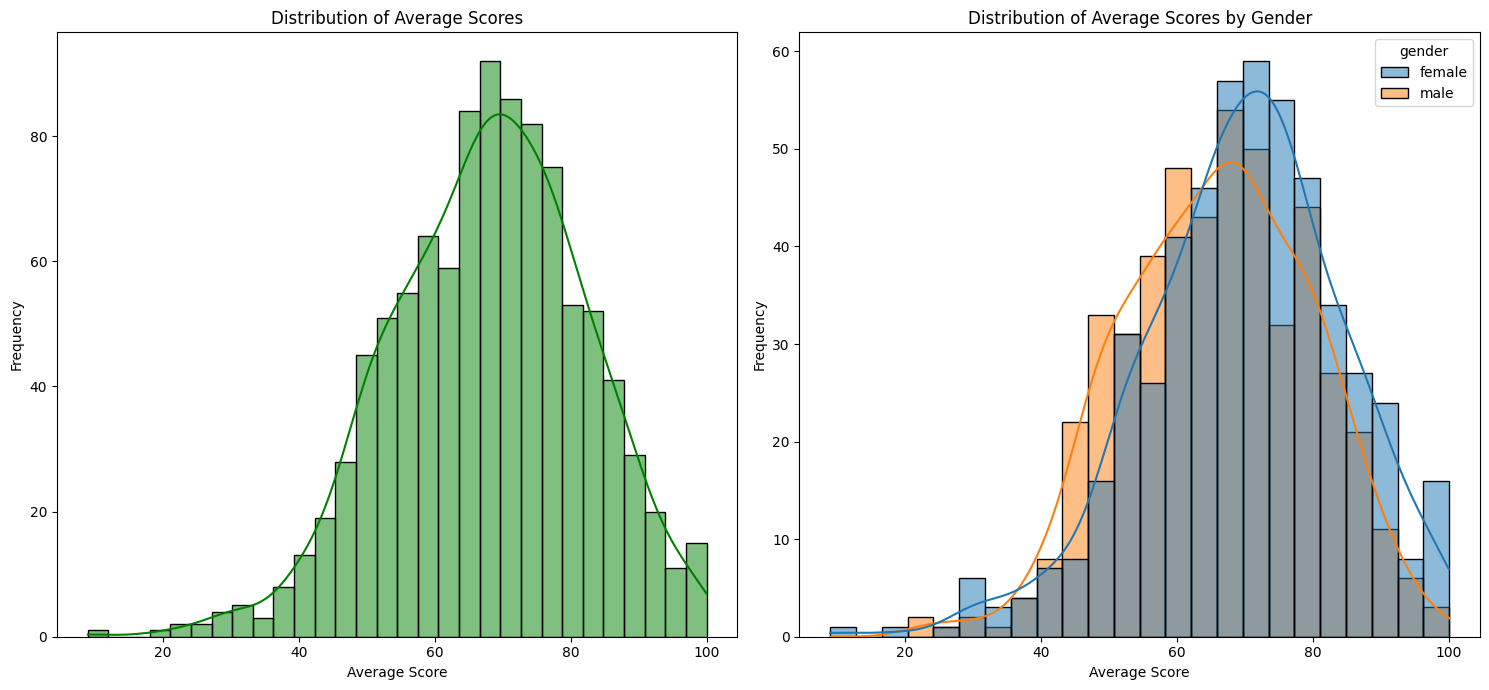

In [33]:
# Create a subplot with two histograms side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot the first histogram with KDE for the overall average score
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

# Plot the second histogram with KDE, differentiated by gender
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.title('Distribution of Average Scores by Gender')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

# Display the subplots
plt.tight_layout()
plt.show()

Insights

- Female students tend to perform well then male students.


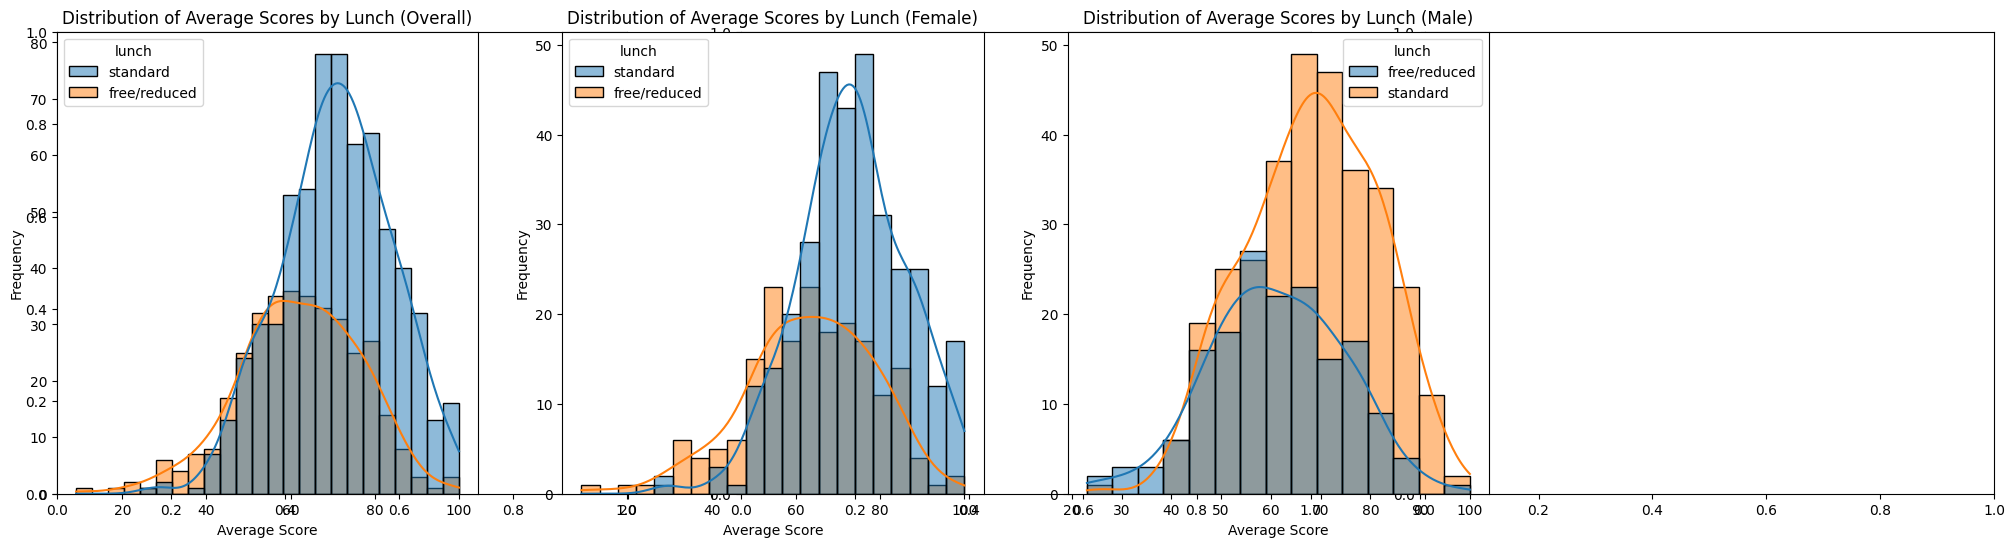

In [34]:
# Create a subplot with three histograms side by side
plt.subplots(1, 3, figsize=(25, 6))

# Plot the first histogram with KDE, differentiated by lunch type (Overall)
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.title('Distribution of Average Scores by Lunch (Overall)')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

# Plot the second histogram with KDE, differentiated by lunch type (Female)
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.title('Distribution of Average Scores by Lunch (Female)')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

# Plot the third histogram with KDE, differentiated by lunch type (Male)
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.title('Distribution of Average Scores by Lunch (Male)')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

# Display the subplots
plt.tight_layout()
plt.show()

Insights

- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

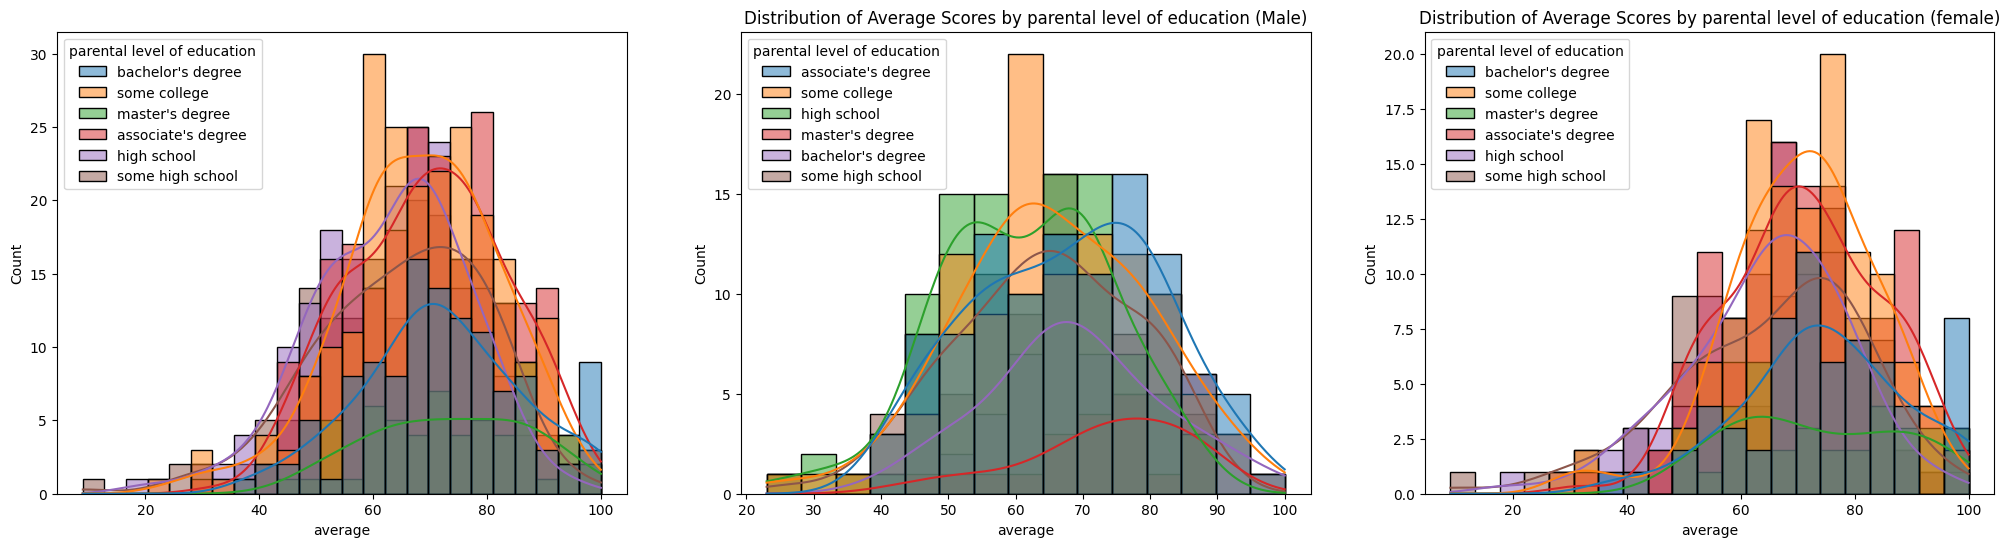

In [39]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')

plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.title('Distribution of Average Scores by parental level of education (Male)')


plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.title('Distribution of Average Scores by parental level of education (female)')


plt.show()

Insights 

- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

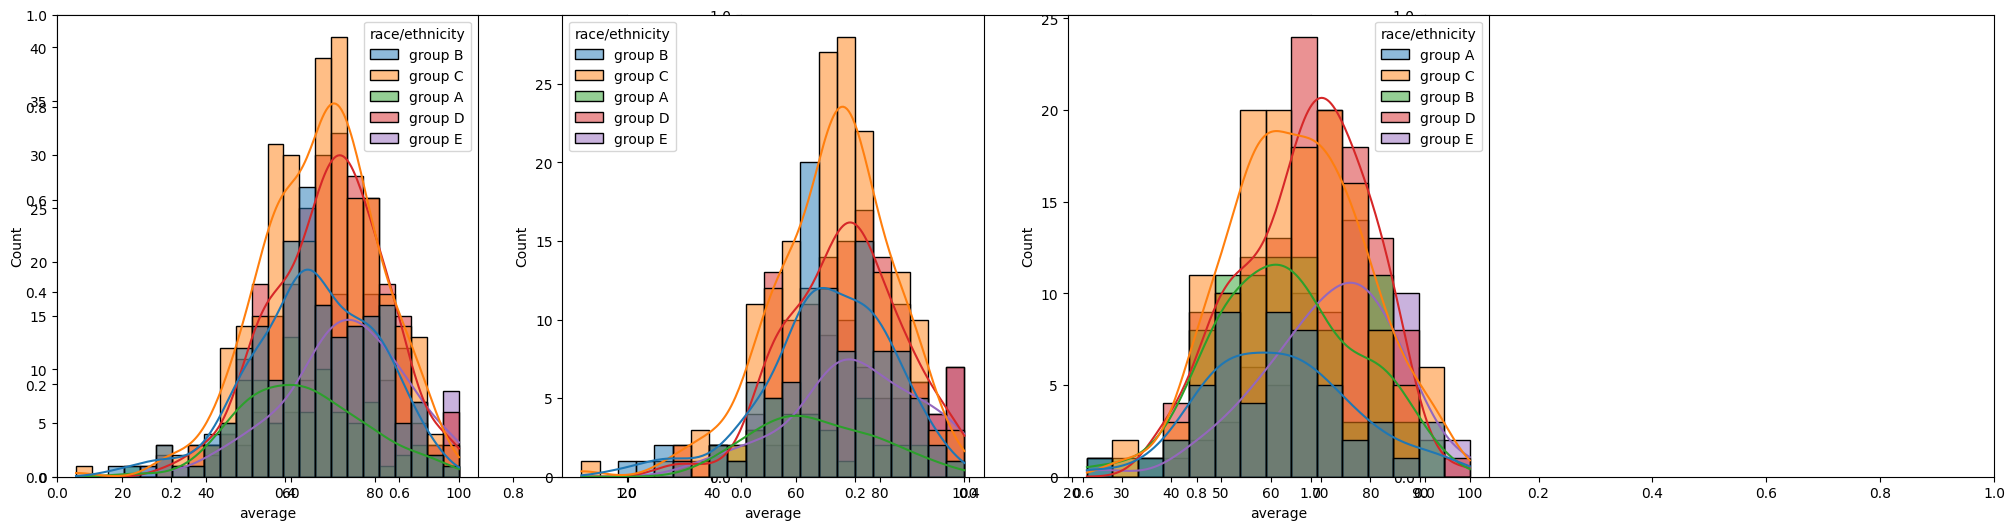

In [40]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

Insights

- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

Maximum Score of Students in All Three Subjects

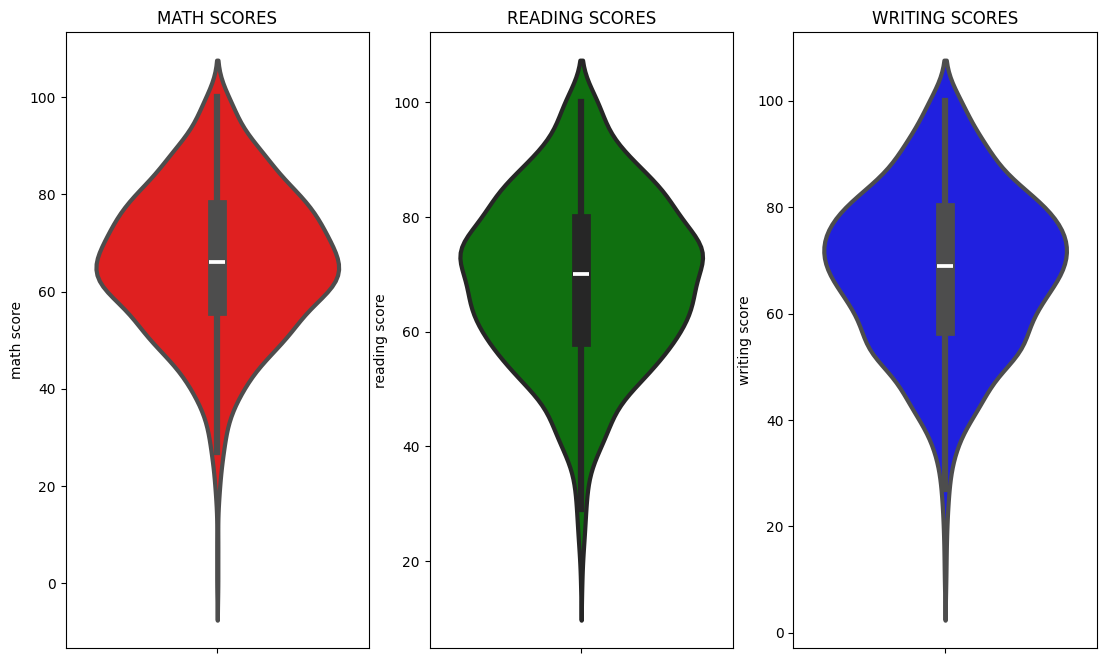

In [41]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

Insights

- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and
writing most of them score from 50-80

Multivariate Analysis Using Pie Plot

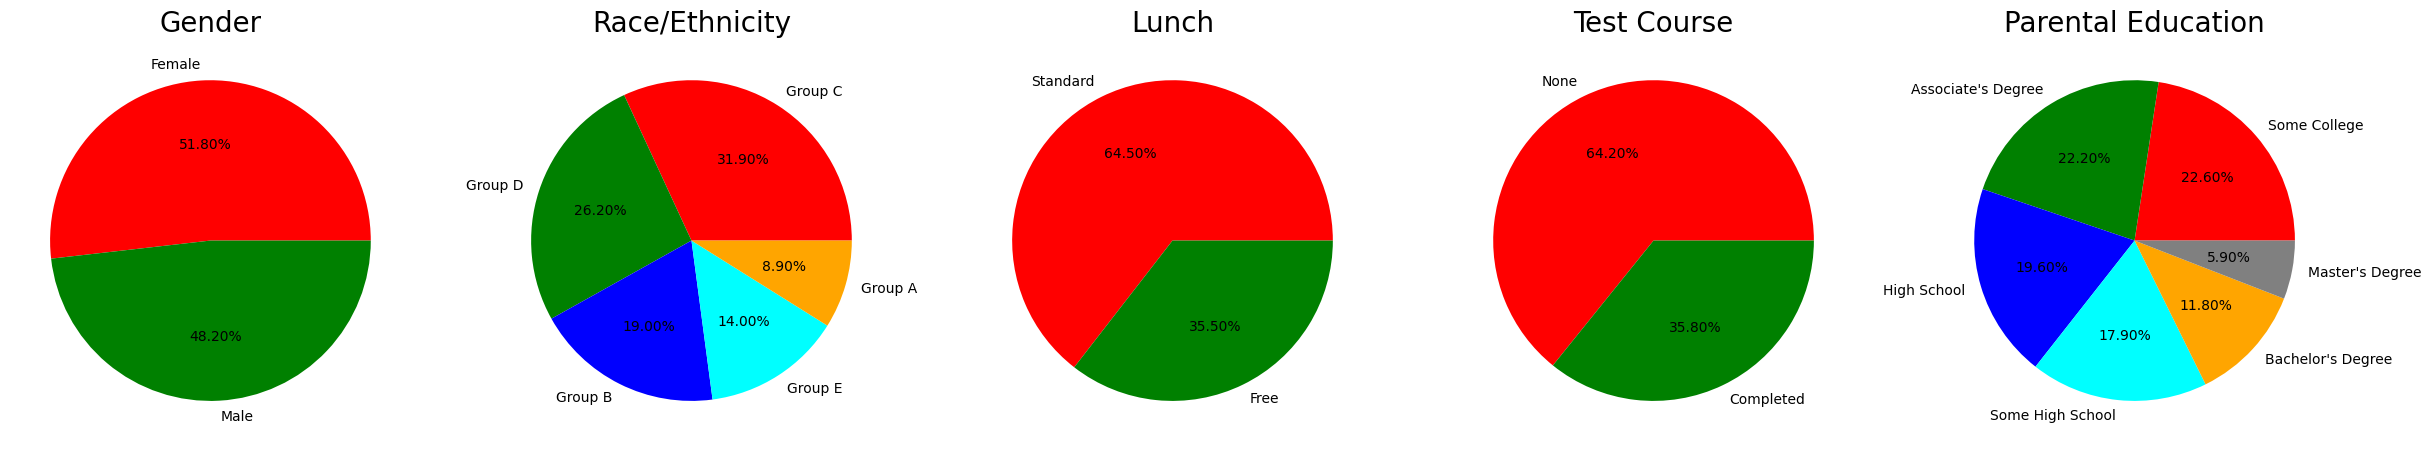

In [42]:
# Set the figure size for the entire plot
plt.rcParams['figure.figsize'] = (30, 12)

# Create a subplot with five pie charts side by side
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

# Continue with similar code blocks for other pie charts

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

# Adjust the layout and display the subplots

plt.grid()
plt.show()

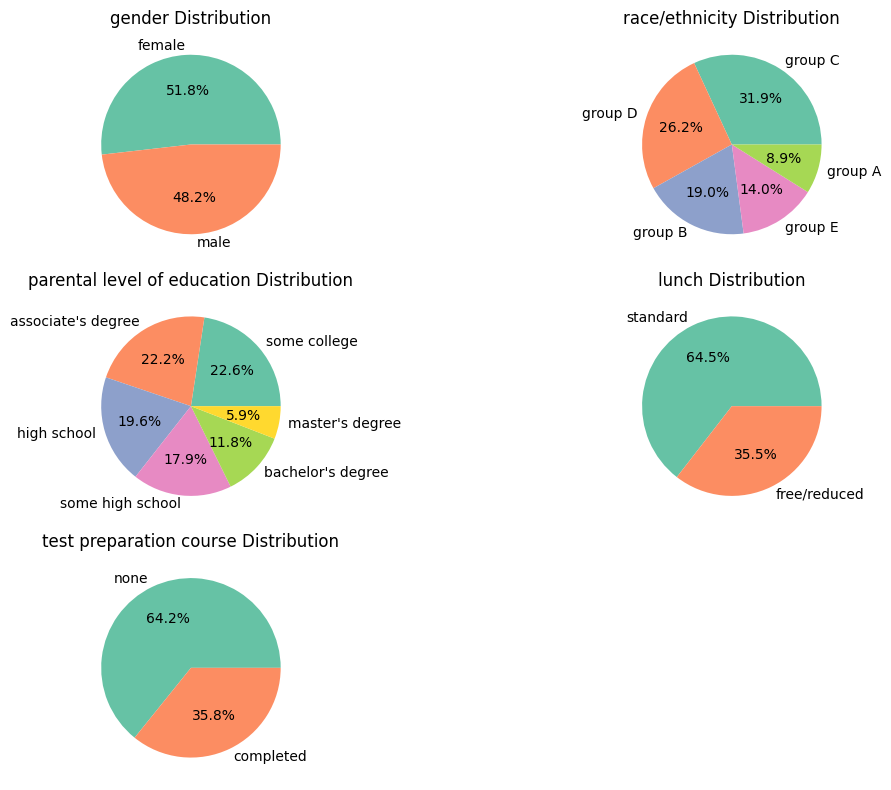

In [48]:
num_features = len(categorical_cols)
num_cols = 2
num_rows = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
axes = axes.flatten()  # Flatten to easily iterate through

# Plot each feature in its subplot
for i, feature in enumerate(categorical_cols):
    # Calculate the distribution of categories
    value_counts = df[feature].value_counts()
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2', len(value_counts)))
    axes[i].set_title(f'{feature} Distribution')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

Insights

- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

UNIVARIATE ANALYSIS 🎓

- How is the distribution of Gender? 👨
- Does gender have any impact on student's performance?

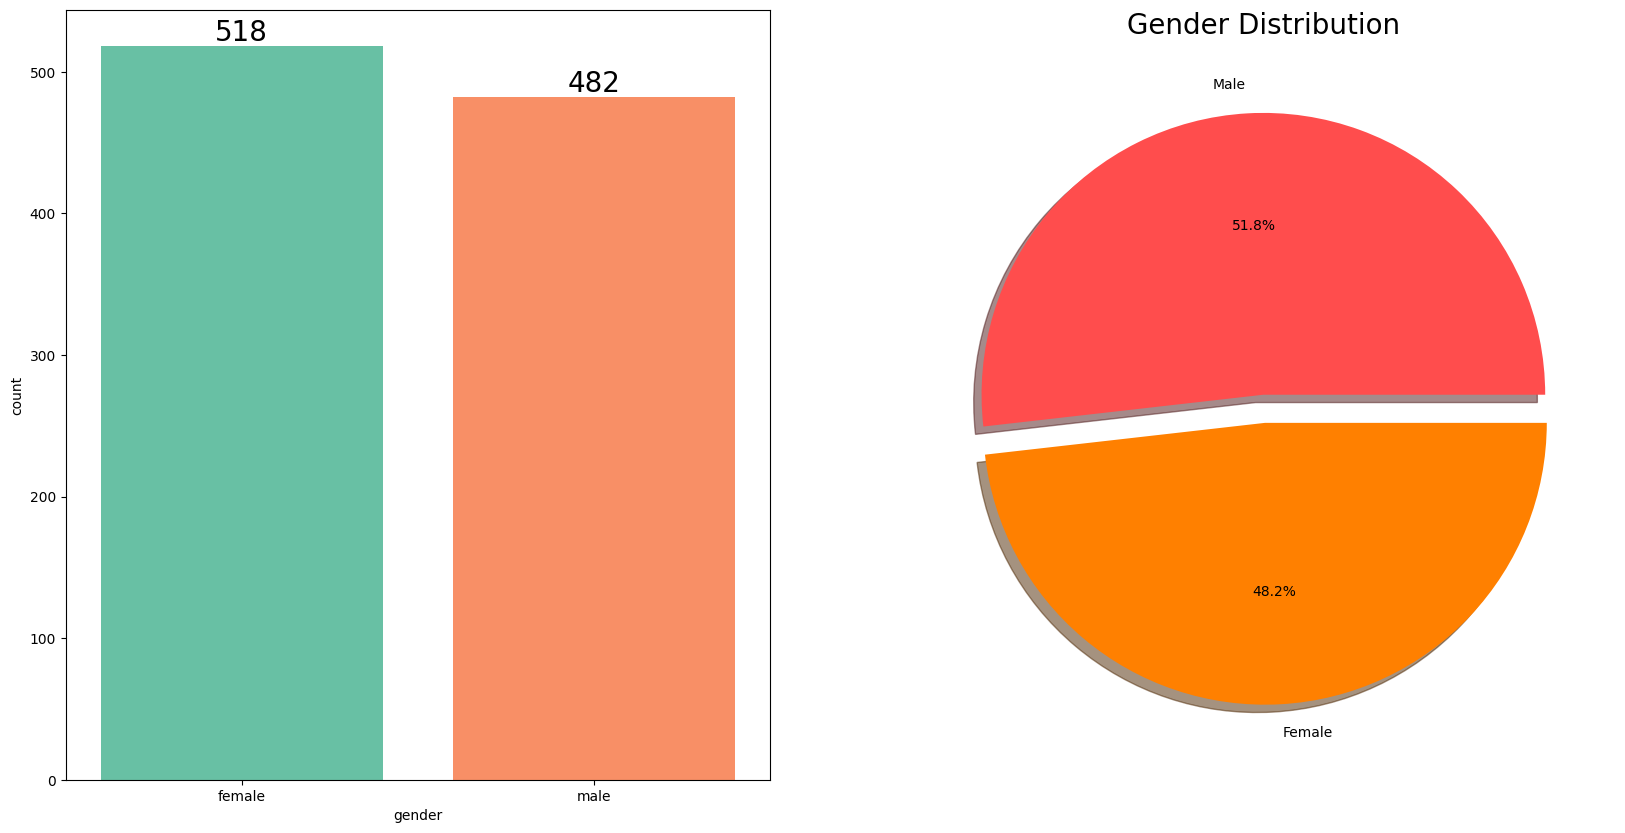

In [50]:
# Create a subplot with two plots side by side
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the countplot for gender on the left side
sns.countplot(x=df['gender'], data=df, palette='Set2', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Plot the pie chart for gender distribution on the right side
plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1],
        autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])
plt.title('Gender Distribution', fontsize=20)

# Display the subplots

plt.show()

Insights 

- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%

BIVARIATE ANALYSIS 

- Is gender impacting student's performance?

RACE/ETHNICITY COLUMN 

- How is Group-wise distribution? 
- Is Race/Ethnicity impacting student's performance?

UNIVARIATE ANALYSIS 

How is Group-wise distribution? 

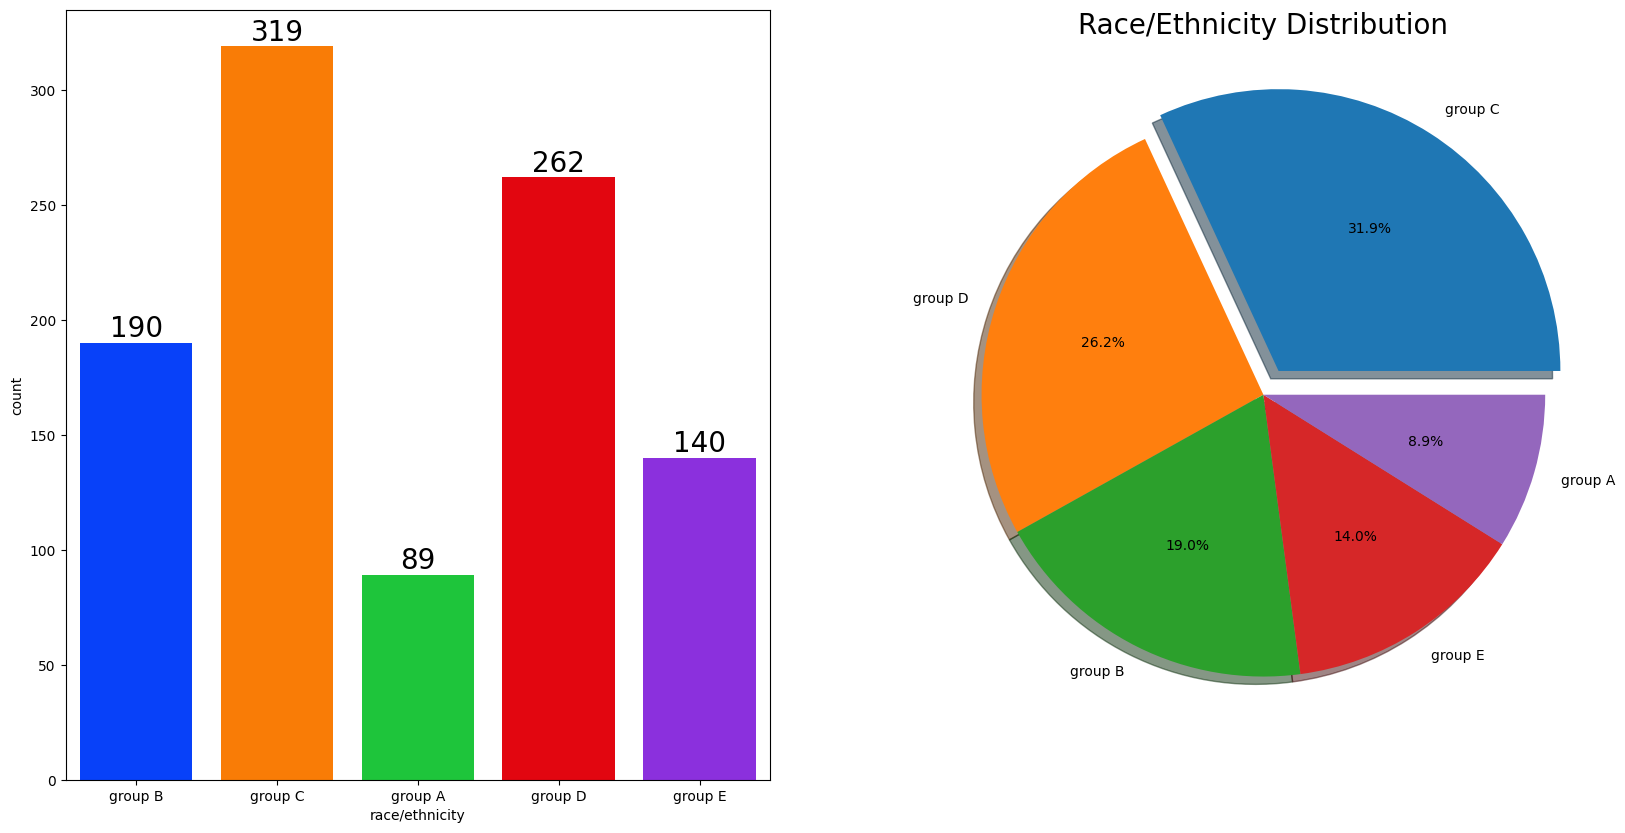

In [57]:
# Create a subplot with two plots side by side
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the countplot for race/ethnicity on the left side
sns.countplot(x=df['race/ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Plot the pie chart for race/ethnicity distribution on the right side
plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index,
        explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True)
plt.title('Race/Ethnicity Distribution', fontsize=20)

# Display the subplots
plt.show()


Insights 

- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

BIVARIATE ANALYSIS

- Is Race/Ethnicity impacting student's performance? 

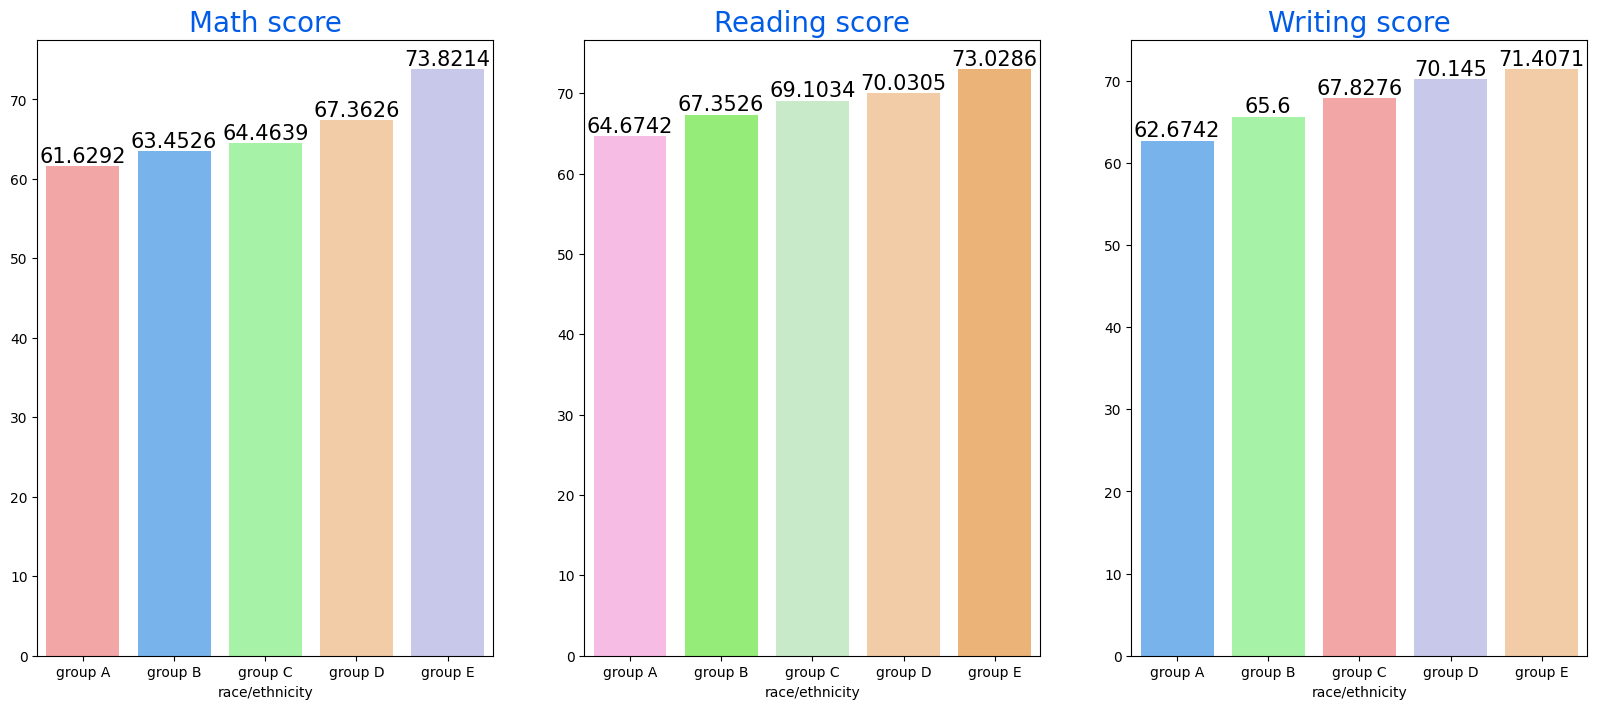

In [60]:
Group_data2 = df.groupby('race/ethnicity')


math_palette = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
reading_palette = ['#ffb3e6', '#8cff66', '#c2f0c2', '#ffcc99', '#ffb366']
writing_palette = ['#66b3ff', '#99ff99', '#ff9999', '#c2c2f0', '#ffcc99']

# Create a subplot with three bar plots side by side
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Plot the bar plot for mean Math scores on the left
sns.barplot(x=Group_data2['math score'].mean().index, y=Group_data2['math score'].mean().values,
            palette=math_palette, ax=ax[0])
ax[0].set_title('Math score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Plot the bar plot for mean Reading scores in the middle
sns.barplot(x=Group_data2['reading score'].mean().index, y=Group_data2['reading score'].mean().values,
            palette=reading_palette, ax=ax[1])
ax[1].set_title('Reading score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Plot the bar plot for mean Writing scores on the right
sns.barplot(x=Group_data2['writing score'].mean().index, y=Group_data2['writing score'].mean().values,
            palette=writing_palette, ax=ax[2])
ax[2].set_title('Writing score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.show()

Insights

- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

PARENTAL LEVEL OF EDUCATION COLUMN 

- What is the educational background of students' parents? 
- Does parental education impact student's performance? 

UNIVARIATE ANALYSIS 
- What is the educational background of students' parents?

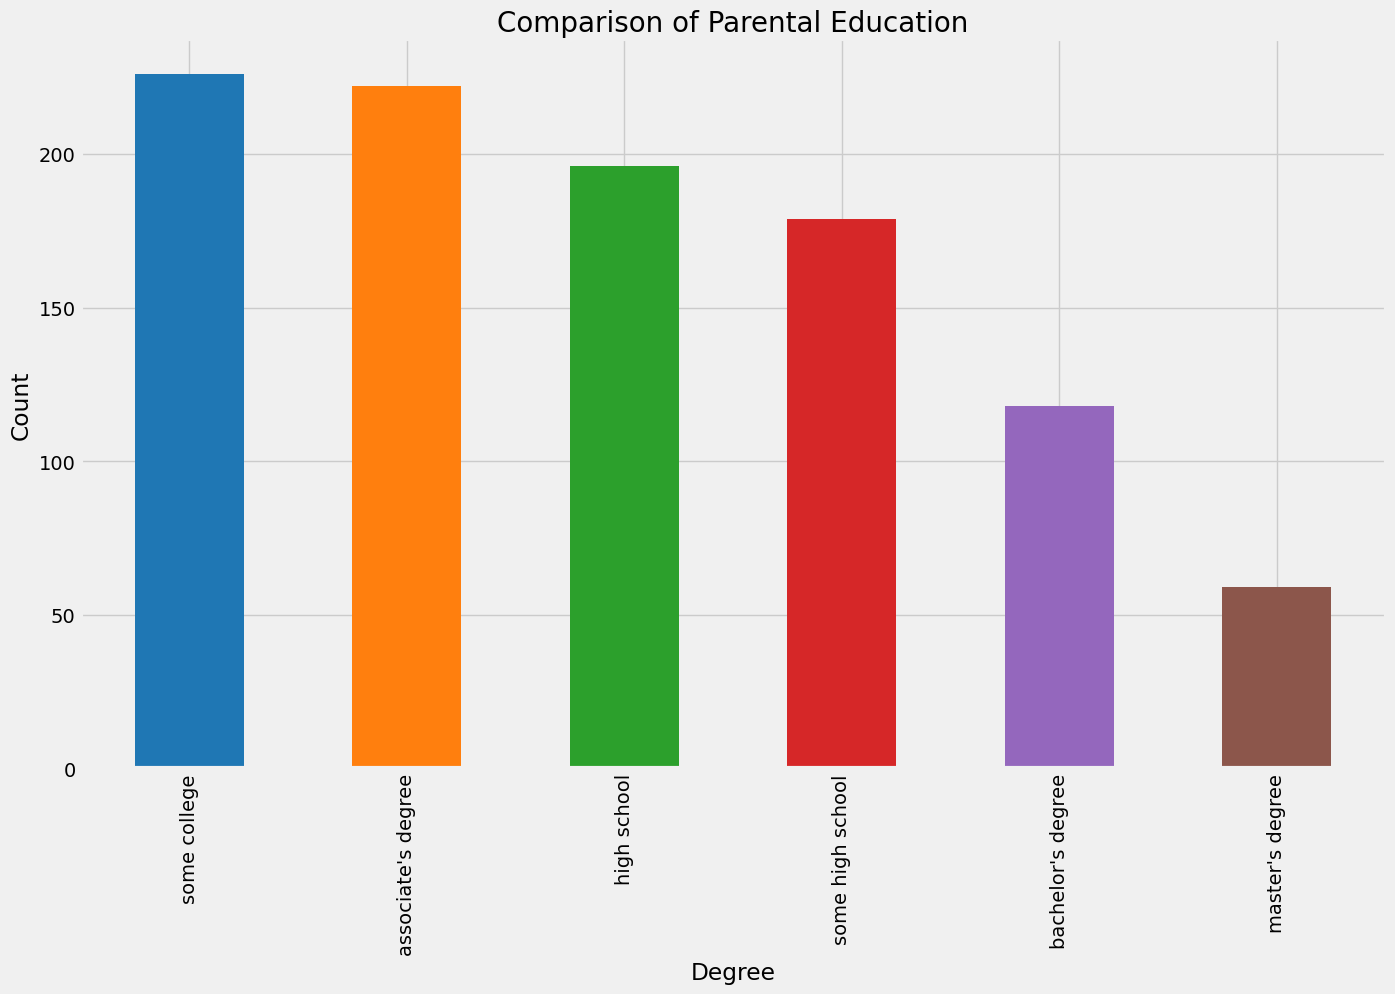

In [61]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

# Create a bar plot for the count of each parental level of education
df['parental level of education'].value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])

# Set title and labels
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')

# Display the plot
plt.show()

Insights 

- Largest number of parents are from some college

BIVARIATE ANALYSIS 

- Is lunch type intake impacting student's performance?

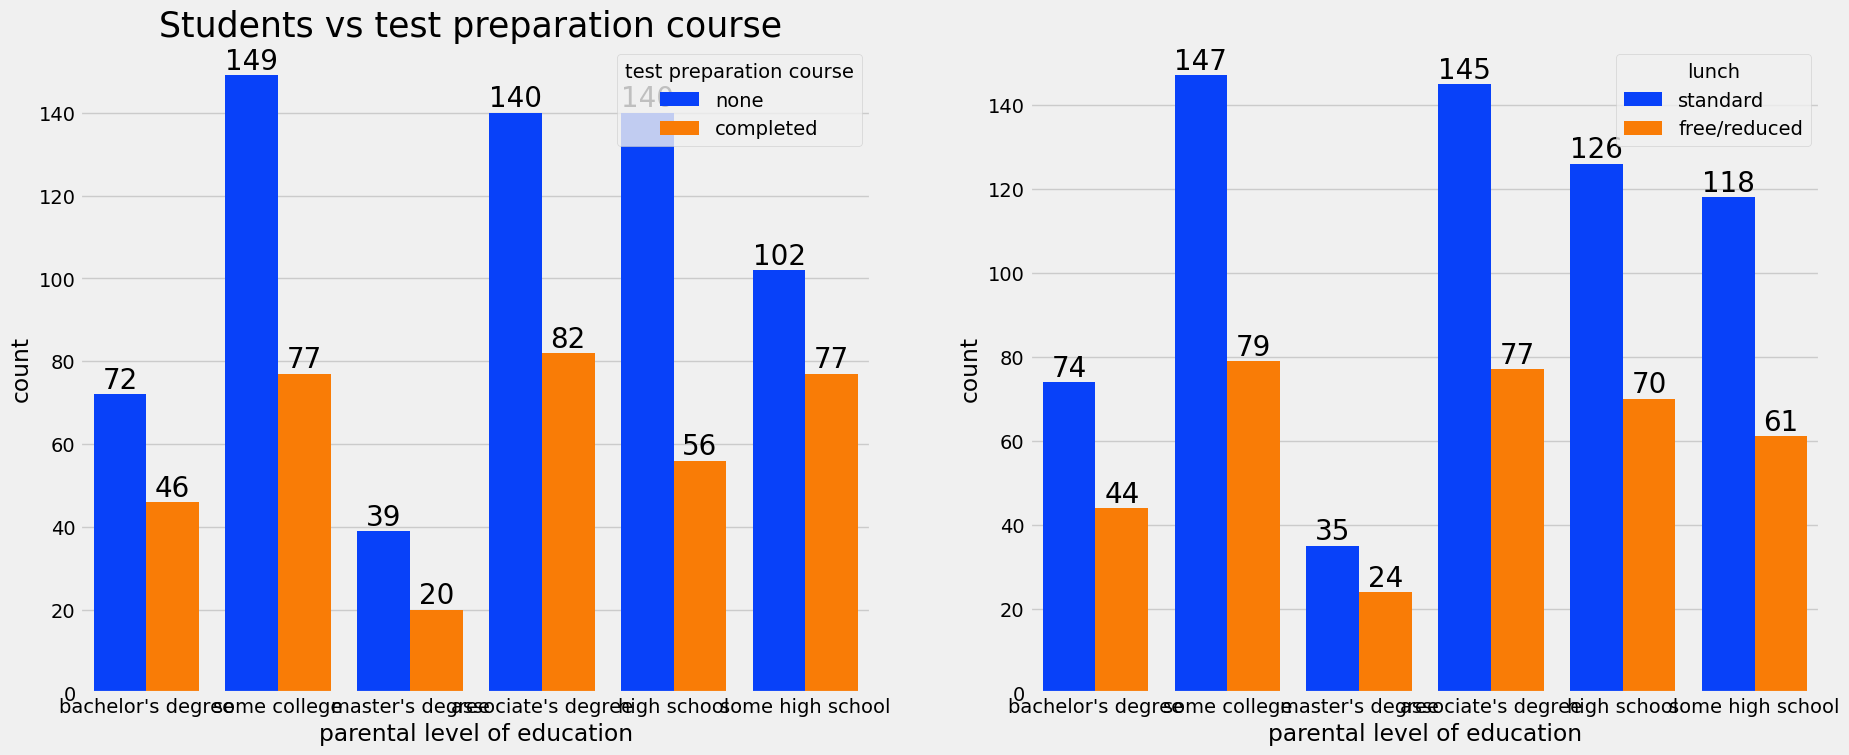

In [64]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20) 

Insights

- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

BIVARIATE ANALYSIS 
- Is Test preparation course impacting student's performance?

<Axes: xlabel='lunch', ylabel='writing score'>

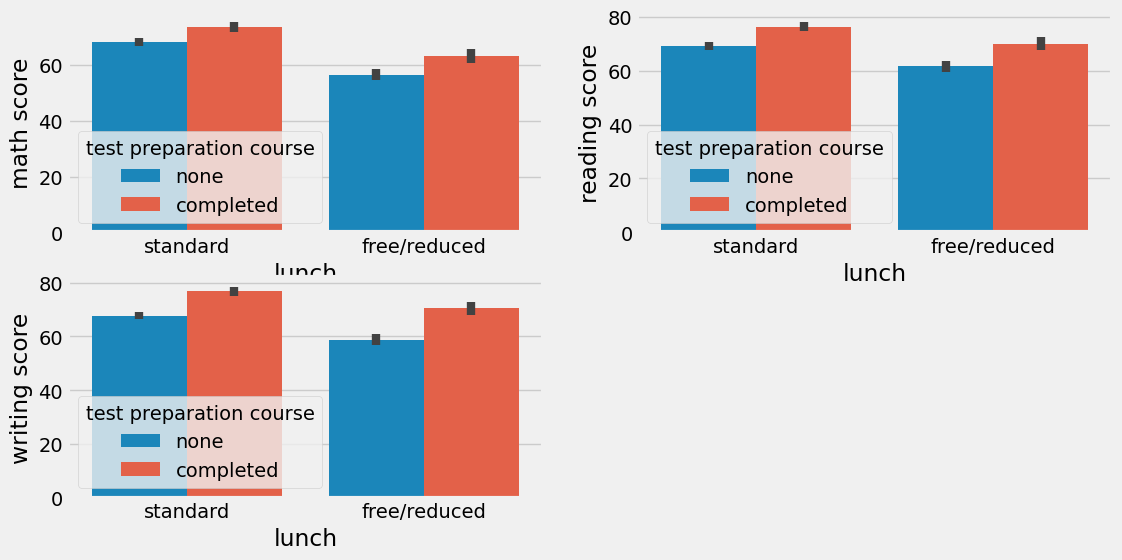

In [65]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

Insights 

- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

CHECKING OUTLIERS

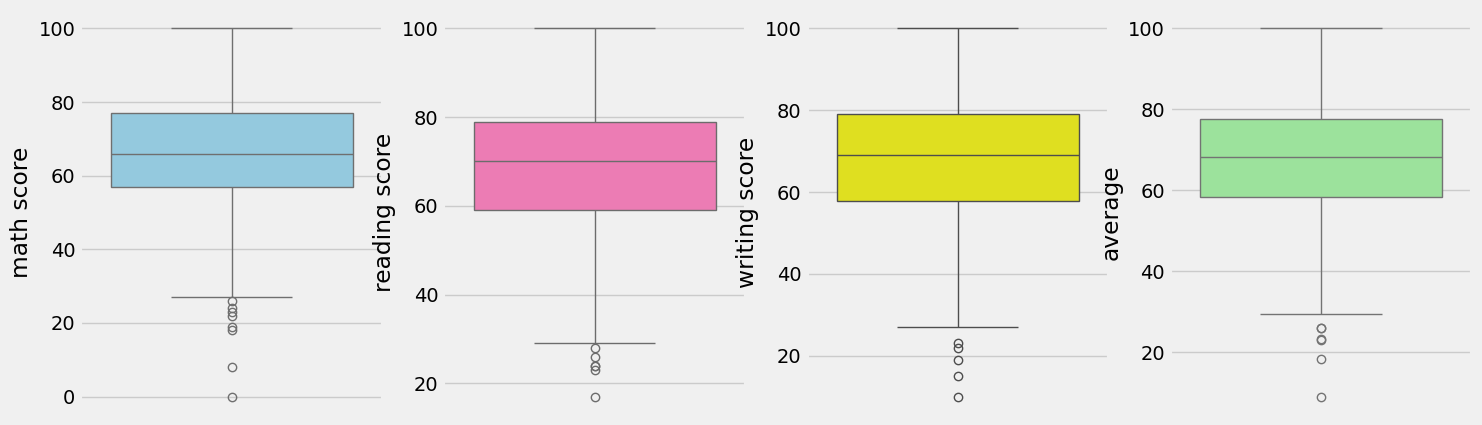

In [70]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

MUTIVARIATE ANALYSIS USING PAIRPLOT

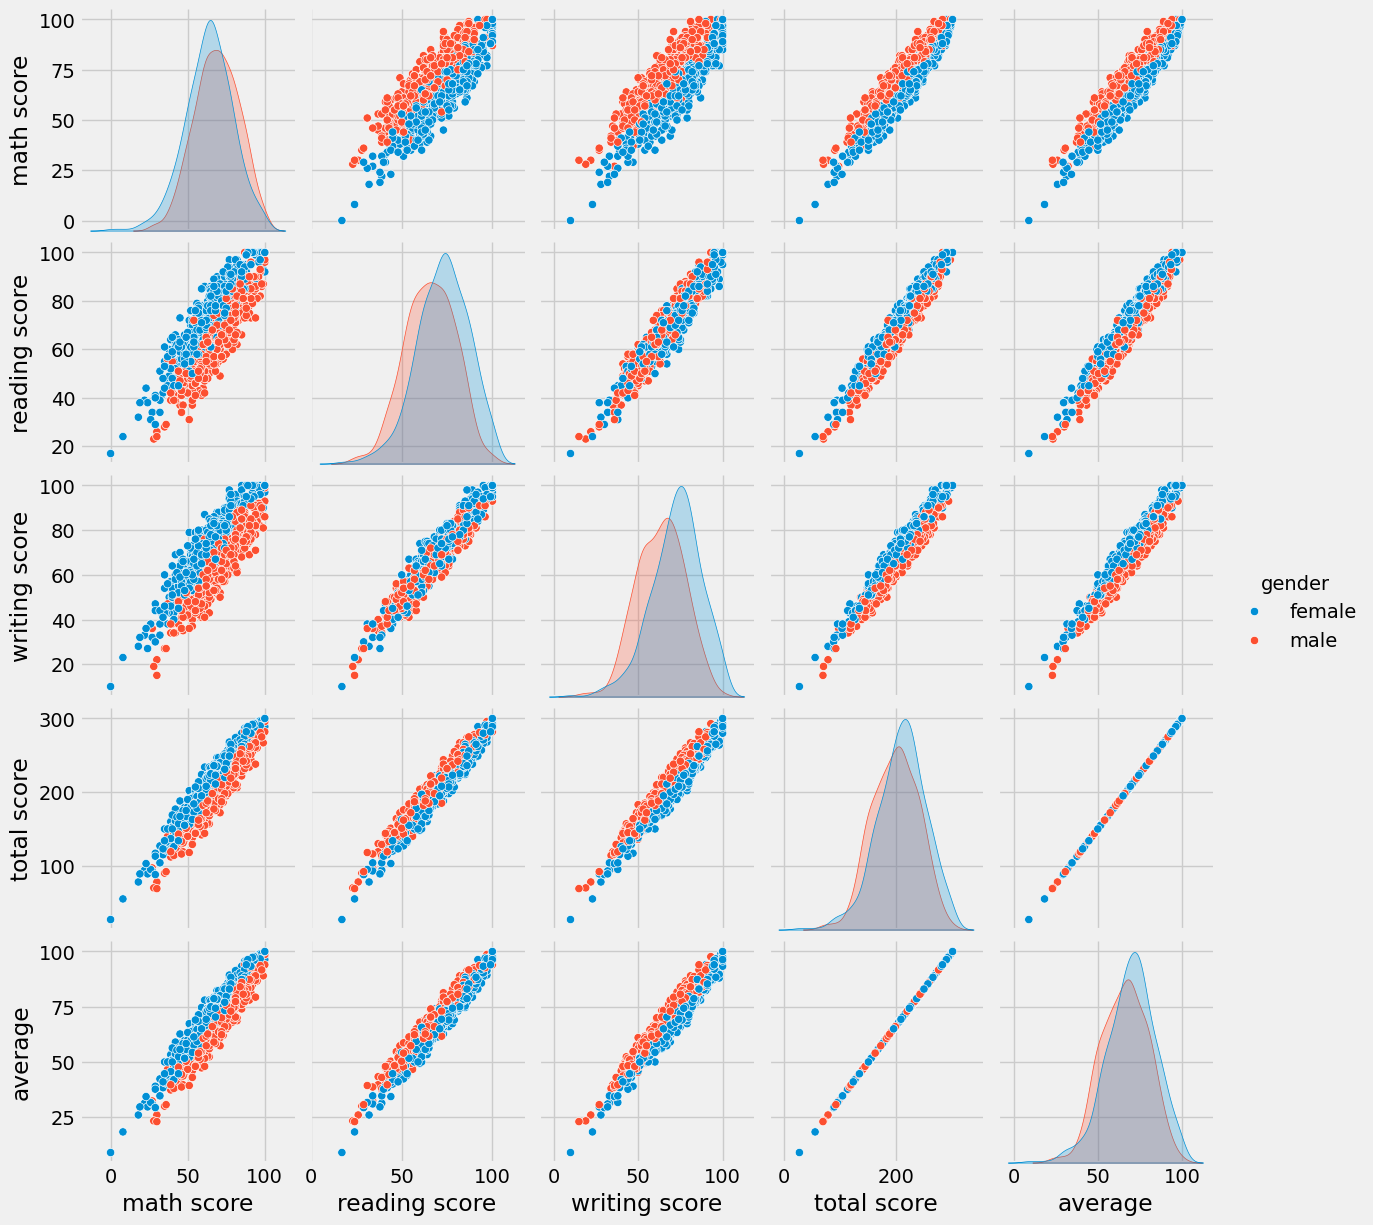

In [71]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights 

From the above plot it is clear that all the scores increase linearly with each other

### Conclusions 
- Student's performance is correlated with factors such as lunch, race, and parental level of education.
- Females have a higher pass percentage and also achieve top scores.
- Student's performance doesn't show a strong correlation with completing a test preparation course.
- Completing a preparation course has shown to be beneficial.